# aykırı değer analizi

In [1]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])
df=df.dropna()#tresh parametresi en az kaç nan varsa atcağını belirler
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

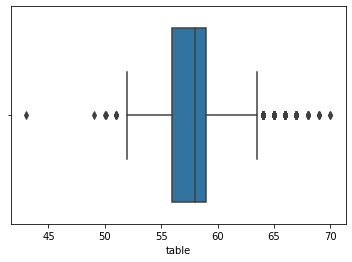

In [4]:
sns.boxplot(x=df_table);#sağ ve sol noktalar aykırı değer


In [6]:
q1=df_table.quantile(0.25)#yüzde 25nci kısmını alır(1.çeyrek)
q3=df_table.quantile(0.75)#yüzde 75nci kısmını alır(3.çeyrek)
IQR=q3-q1#interquartier                                                     (eşik değer hesaplama)

In [7]:
q1

56.0

In [8]:
q3

59.0

In [9]:
IQR

3.0

In [11]:
alt_sinir=q1-1.5*IQR
üst_sinir=q3+1.5*IQR #aykırı değer için sınırları hesaplama formülü

In [12]:
alt_sinir

51.5

In [13]:
üst_sinir

63.5

In [14]:
#aslında biz noktalardan önceki çizgileri el yordamıyla hesapladık(aykırı değer sınırları)

In [15]:
df_table<alt_sinir

0        False
1        False
2        False
3        False
4        False
         ...  
20884    False
20885    False
20886    False
20887    False
20888    False
Name: table, Length: 20889, dtype: bool

In [17]:
(df_table<alt_sinir)|(df_table>üst_sinir)#| yada demek

0        False
1        False
2         True
3        False
4        False
         ...  
20884    False
20885    False
20886    False
20887    False
20888    False
Name: table, Length: 20889, dtype: bool

In [18]:
aykırıtf=(df_table<alt_sinir)

In [19]:
aykırıtf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [20]:
df_table[aykırıtf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
Name: table, dtype: float64

In [22]:
df_table[aykırıtf].index

Int64Index([1515, 3238, 3979, 4150, 5979, 7418, 8853, 11368], dtype='int64')

# Aykırı Değer Problemini Çözmek


In [26]:
#silme

In [27]:
import pandas as pd

In [28]:
type(df_table)

pandas.core.series.Series

In [29]:
df_table=pd.DataFrame(df_table)

In [30]:
df_table.head()

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0


In [32]:
df_table.shape

(20889, 1)

In [35]:
t_df=df_table[~((df_table<alt_sinir)|(df_table>üst_sinir)).any(axis=1)]#tilda - işareti yani aykırılar dışında gibi axis 1 demekse sütunda işlem

In [37]:
t_df.shape

(20621, 1)

In [38]:
#ortalama ile doldurma

In [39]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [42]:
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [43]:
aykırıtf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [44]:
df_table[aykırıtf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
Name: table, dtype: float64

In [48]:
df_table.mean()

57.76617358418308

In [49]:
df_table[aykırıtf]=df_table.mean()

<ipython-input-49-d2a1e273cc75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykırıtf]=df_table.mean()


In [50]:
df_table[aykırıtf]

1515     57.766174
3238     57.766174
3979     57.766174
4150     57.766174
5979     57.766174
7418     57.766174
8853     57.766174
11368    57.766174
Name: table, dtype: float64

In [51]:
#baskılama

In [52]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [54]:
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [55]:
df_table[aykırıtf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
Name: table, dtype: float64

In [56]:
alt_sinir

51.5

In [57]:
df_table[aykırıtf]=alt_sinir

<ipython-input-57-385e6fd8c891>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykırıtf]=alt_sinir


In [58]:
df_table[aykırıtf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
Name: table, dtype: float64

# Çok Değişkenli Aykırı Gözlem Analizi


In [59]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [60]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor#yoğunluk azalırsa aykırılık artar

In [61]:
clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1)#yoğunluk

In [62]:
clf.fit_predict(df)

array([-1, -1, -1, ..., -1, -1, -1])

In [63]:
df_scores=clf.negative_outlier_factor_

In [65]:
df_scores[0:10]

array([-1.25828131, -1.26933664, -1.29331959, -1.05525469, -1.03691404,
       -1.01846075, -1.01861874, -1.00440223, -1.01857701, -1.01391585])

In [66]:
np.sort(df_scores[0:10])

array([-1.29331959, -1.26933664, -1.25828131, -1.05525469, -1.03691404,
       -1.01861874, -1.01857701, -1.01846075, -1.01391585, -1.00440223])

In [69]:
np.sort(df_scores)[0:20]#yoğunluk scorları

array([-4.37081214, -4.29842288, -3.45066056, -3.40044967, -3.35007989,
       -3.29322345, -3.18715386, -2.86404215, -2.74570485, -2.74088344,
       -2.6924846 , -2.68516533, -2.62781429, -2.45795161, -2.45606488,
       -2.42224821, -2.39355139, -2.3903664 , -2.37564628, -2.36766184])

In [70]:
esık_deger=np.sort(df_scores)[13]

In [ ]:
#silme

In [77]:
aykırı_tf=df_scores<esık_deger

In [78]:
aykırı_tf

array([False, False, False, ..., False, False, False])

In [79]:
yeni_df=df[aykırı_tf]

In [80]:
yeni_df

,carat,depth,table,price,x,y,z
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
314,0.76,59.0,70.0,2800,5.89,5.80,3.46
4518,1.00,43.0,59.0,3634,6.32,6.27,3.97
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
8014,1.50,70.1,58.0,4328,6.96,6.85,4.84
8186,1.50,71.3,58.0,4368,6.85,6.81,4.87
8392,0.50,69.8,55.0,584,4.89,4.80,3.38
8672,1.02,71.8,56.0,4455,6.04,5.97,4.31
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
11368,1.04,62.9,43.0,4997,6.45,6.41,4.04


In [81]:
notaykırı_tf=df_scores>esık_deger

In [82]:
yeni_df=df[notaykırı_tf]

In [83]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
20884,1.29,62.3,58.0,9105,6.98,7.01,4.36
20885,1.62,61.6,60.0,9106,7.52,7.55,4.64
20886,1.21,61.6,59.0,9107,6.84,6.77,4.19
20887,1.51,62.3,58.0,9107,7.31,7.35,4.57


In [84]:
#baskılama

In [85]:
df[df_scores==esık_deger]

,carat,depth,table,price,x,y,z
1275,0.99,58.0,67.0,2949,6.57,6.5,3.79


In [86]:
baskı_deger=df[df_scores==esık_deger]

In [87]:
aykırılar=df[aykırı_tf]

In [89]:
res

rec.array([(   91, 0.86, 55.1, 69., 2757, 6.45, 6.33, 3.52),
           (  314, 0.76, 59. , 70., 2800, 5.89, 5.8 , 3.46),
           ( 4518, 1.  , 43. , 59., 3634, 6.32, 6.27, 3.97),
           ( 6341, 1.  , 44. , 53., 4032, 6.31, 6.24, 4.12),
           ( 8014, 1.5 , 70.1, 58., 4328, 6.96, 6.85, 4.84),
           ( 8186, 1.5 , 71.3, 58., 4368, 6.85, 6.81, 4.87),
           ( 8392, 0.5 , 69.8, 55.,  584, 4.89, 4.8 , 3.38),
           ( 8672, 1.02, 71.8, 56., 4455, 6.04, 5.97, 4.31),
           (10377, 1.09, 43. , 54., 4778, 6.53, 6.55, 4.12),
           (11368, 1.04, 62.9, 43., 4997, 6.45, 6.41, 4.04),
           (11963, 1.  , 63.3, 53., 5139, 0.  , 0.  , 0.  ),
           (17717, 0.5 , 71. , 57.,  613, 4.87, 4.79, 3.43),
           (17719, 0.5 , 68.4, 54.,  613, 4.94, 4.82, 3.35)],
          dtype=[('index', '<i8'), ('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [88]:
res=aykırılar.to_records(index="False")#indeksiz bi aray yaptı

In [91]:
res[:]=baskı_deger.to_records(index="False")

In [92]:
res

rec.array([(1275, 0.99, 58., 67., 2949, 6.57, 6.5, 3.79),
           (1275, 0.99, 58., 67., 2949, 6.57, 6.5, 3.79),
           (1275, 0.99, 58., 67., 2949, 6.57, 6.5, 3.79),
           (1275, 0.99, 58., 67., 2949, 6.57, 6.5, 3.79),
           (1275, 0.99, 58., 67., 2949, 6.57, 6.5, 3.79),
           (1275, 0.99, 58., 67., 2949, 6.57, 6.5, 3.79),
           (1275, 0.99, 58., 67., 2949, 6.57, 6.5, 3.79),
           (1275, 0.99, 58., 67., 2949, 6.57, 6.5, 3.79),
           (1275, 0.99, 58., 67., 2949, 6.57, 6.5, 3.79),
           (1275, 0.99, 58., 67., 2949, 6.57, 6.5, 3.79),
           (1275, 0.99, 58., 67., 2949, 6.57, 6.5, 3.79),
           (1275, 0.99, 58., 67., 2949, 6.57, 6.5, 3.79),
           (1275, 0.99, 58., 67., 2949, 6.57, 6.5, 3.79)],
          dtype=[('index', '<i8'), ('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [93]:
df[aykırı_tf]

,carat,depth,table,price,x,y,z
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
314,0.76,59.0,70.0,2800,5.89,5.80,3.46
4518,1.00,43.0,59.0,3634,6.32,6.27,3.97
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
8014,1.50,70.1,58.0,4328,6.96,6.85,4.84
8186,1.50,71.3,58.0,4368,6.85,6.81,4.87
8392,0.50,69.8,55.0,584,4.89,4.80,3.38
8672,1.02,71.8,56.0,4455,6.04,5.97,4.31
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
11368,1.04,62.9,43.0,4997,6.45,6.41,4.04


In [97]:
df[aykırı_tf]=pd.DataFrame(res,index=df[aykırı_tf].index)#indeksleri orjinal hali olarak ayarladık

ValueError: shape mismatch: value array of shape (13,8)  could not be broadcast to indexing result of shape (13,7)

# Eksik Veri 

In [101]:
#hızlı çözüm

In [130]:
#NaN:eksik değer


In [102]:
import numpy as np
import pandas as pd

In [134]:
v1=np.array([1,3,6,np.NaN,7,1,np.NaN,15])
v2=np.array([2,3,np.NaN,1,np.NaN,np.NaN,5,14])
v3=np.array([2,np.NaN,5,8,12,6,14,31])
df=pd.DataFrame({"V1":v1,
               "V2":v2,
               "V3":v3})

In [110]:
df

,V1,V2,V3
0,1.0,2.0,2.0
1,3.0,3.0,NaN
2,6.0,NaN,5.0
3,NaN,1.0,8.0
4,7.0,NaN,12.0
5,1.0,NaN,6.0
6,NaN,5.0,14.0
7,15.0,14.0,31.0


In [112]:
df.isnull().sum()

V1    2
V2    3
V3    1
dtype: int64

In [113]:
df.notnull().sum()

V1    6
V2    5
V3    7
dtype: int64

In [114]:
df.isnull().sum().sum()

6

In [115]:
df.isnull()

,V1,V2,V3
0,False,False,False
1,False,False,True
2,False,True,False
3,True,False,False
4,False,True,False
5,False,True,False
6,True,False,False
7,False,False,False


In [117]:
df[df.isnull().any(axis=1)]

,V1,V2,V3
1,3.0,3.0,NaN
2,6.0,NaN,5.0
3,NaN,1.0,8.0
4,7.0,NaN,12.0
5,1.0,NaN,6.0
6,NaN,5.0,14.0


In [118]:
df[df.notnull().all(axis=1)]

,V1,V2,V3
0,1.0,2.0,2.0
7,15.0,14.0,31.0


In [120]:
df[df["V1"].notnull()&df["V2"].notnull()&df["V3"].notnull()]#yukardakinin meali

,V1,V2,V3
0,1.0,2.0,2.0
7,15.0,14.0,31.0


In [121]:
#eksik değerlerin direk silinmesi

In [122]:
df.dropna()

,V1,V2,V3
0,1.0,2.0,2.0
7,15.0,14.0,31.0


In [123]:
df

,V1,V2,V3
0,1.0,2.0,2.0
1,3.0,3.0,NaN
2,6.0,NaN,5.0
3,NaN,1.0,8.0
4,7.0,NaN,12.0
5,1.0,NaN,6.0
6,NaN,5.0,14.0
7,15.0,14.0,31.0


In [125]:
df.dropna(inplace=True)

In [126]:
df

,V1,V2,V3
0,1.0,2.0,2.0
7,15.0,14.0,31.0


In [128]:
#basit değer atama

In [129]:
df["V1"]

0     1.0
1     3.0
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7    15.0
Name: V1, dtype: float64

In [131]:
df["V1"].mean()

5.5

In [132]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     3.0
2     6.0
3     5.5
4     7.0
5     1.0
6     5.5
7    15.0
Name: V1, dtype: float64

In [133]:
df["V2"].fillna(0)

0     2.0
1     3.0
2     0.0
3     1.0
4     0.0
5     0.0
6     5.0
7    14.0
Name: V2, dtype: float64

In [136]:
df.apply(lambda x:x.fillna(x.mean(),axis=0))

,V1,V2,V3
0,1.0,2.0,2.000000
1,3.0,3.0,11.142857
2,6.0,5.0,5.000000
3,5.5,1.0,8.000000
4,7.0,5.0,12.000000
5,1.0,5.0,6.000000
6,5.5,5.0,14.000000
7,15.0,14.0,31.000000


# Eksik Veri Yapısının Görselleştirilmesi


In [137]:
!pip install missingno

In [138]:
import missingno as msno

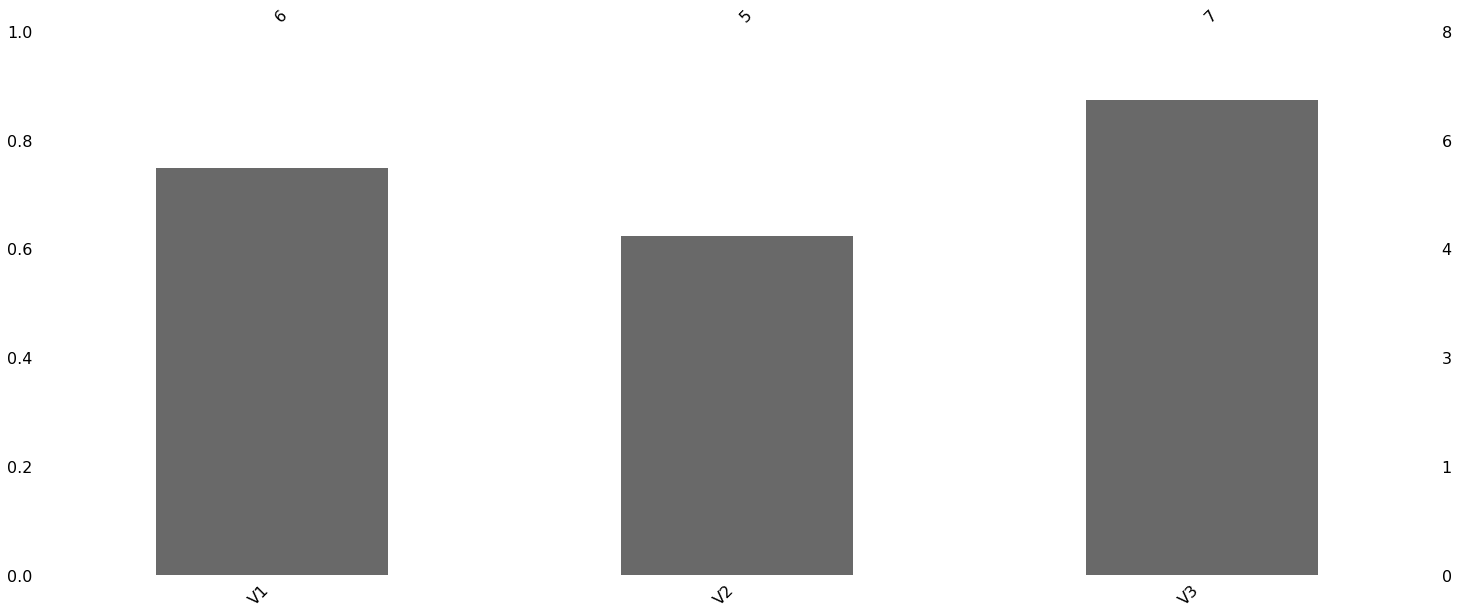

In [139]:
msno.bar(df);#sol taraf yüzdeli sağ sayısı

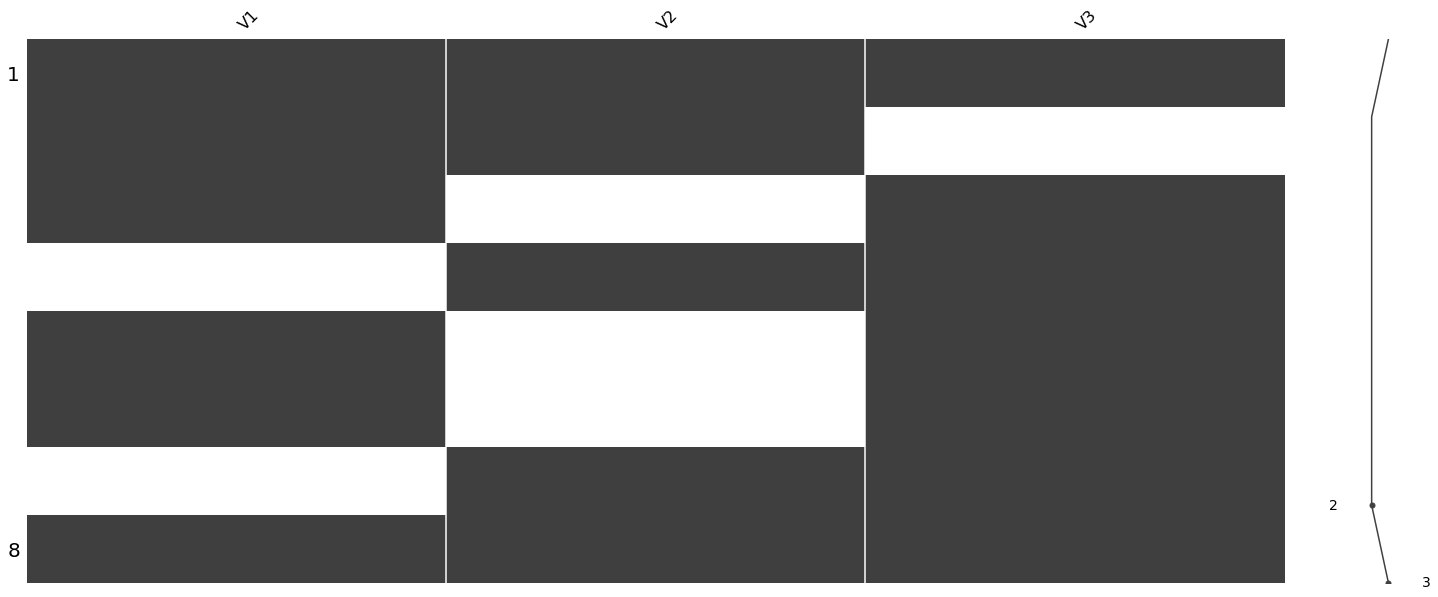

In [140]:
msno.matrix(df);#soldaki gözlemler beyazlar boş NaN değerler sağ kaç tane dolu olduğu

In [142]:
df=sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [144]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

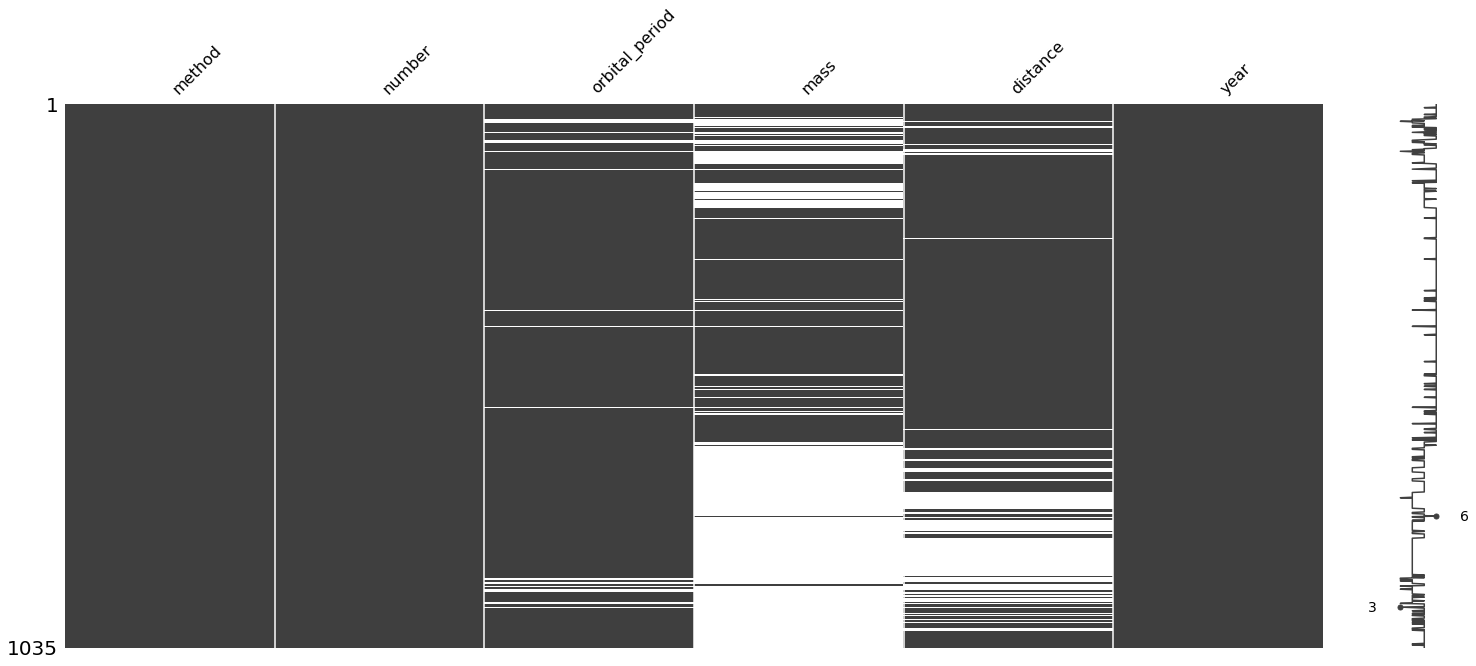

In [146]:
msno.matrix(df);

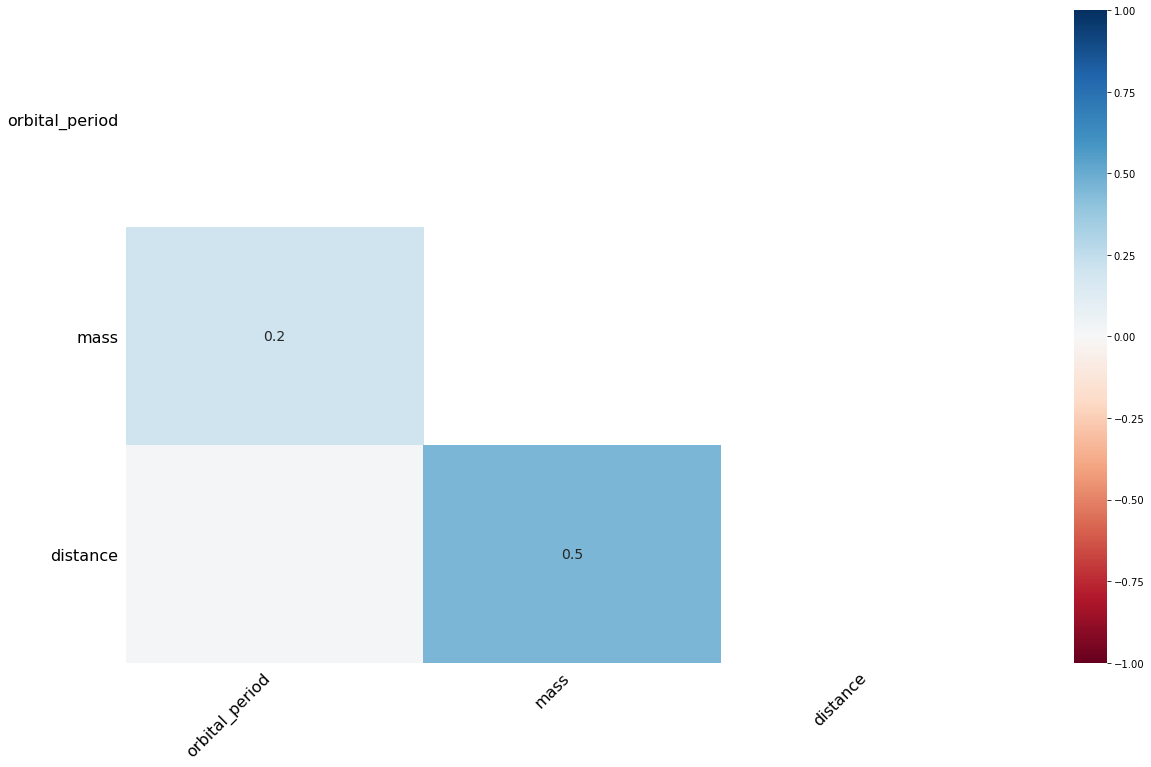

In [147]:
msno.heatmap(df);#nulliaty corelation a göre 1 se 2 side boş veya dolu mesela

# silme yöntemleri

In [169]:
v1=np.array([1,np.NaN,6,np.NaN,7,1,np.NaN,15])
v2=np.array([2,np.NaN,3,1,np.NaN,np.NaN,5,14])
v3=np.array([2,np.NaN,5,8,12,6,14,31])
df=pd.DataFrame({"V1":v1,
               "V2":v2,
               "V3":v3})
df

,V1,V2,V3
0,1.0,2.0,2.0
1,NaN,NaN,NaN
2,6.0,3.0,5.0
3,NaN,1.0,8.0
4,7.0,NaN,12.0
5,1.0,NaN,6.0
6,NaN,5.0,14.0
7,15.0,14.0,31.0


In [157]:
df.dropna()

,V1,V2,V3
0,1.0,2.0,2.0
2,6.0,3.0,5.0
7,15.0,14.0,31.0


In [158]:
df.dropna(how="all")

,V1,V2,V3
0,1.0,2.0,2.0
2,6.0,3.0,5.0
3,NaN,1.0,8.0
4,7.0,NaN,12.0
5,1.0,NaN,6.0
6,NaN,5.0,14.0
7,15.0,14.0,31.0


In [159]:
df.dropna(axis=1)

""
0
1
2
3
4
5
6
7


In [162]:
df.dropna(axis=0)

,V1,V2,V3
0,1.0,2.0,2.0
2,6.0,3.0,5.0
7,15.0,14.0,31.0


In [163]:
df["silbeni"]=np.NaN

In [164]:
df

,V1,V2,V3,silbeni
0,1.0,2.0,2.0,NaN
1,NaN,NaN,NaN,NaN
2,6.0,3.0,5.0,NaN
3,NaN,1.0,8.0,NaN
4,7.0,NaN,12.0,NaN
5,1.0,NaN,6.0,NaN
6,NaN,5.0,14.0,NaN
7,15.0,14.0,31.0,NaN


In [165]:
df.dropna(axis=1,how="all")

,V1,V2,V3
0,1.0,2.0,2.0
1,NaN,NaN,NaN
2,6.0,3.0,5.0
3,NaN,1.0,8.0
4,7.0,NaN,12.0
5,1.0,NaN,6.0
6,NaN,5.0,14.0
7,15.0,14.0,31.0


In [166]:
df

,V1,V2,V3,silbeni
0,1.0,2.0,2.0,NaN
1,NaN,NaN,NaN,NaN
2,6.0,3.0,5.0,NaN
3,NaN,1.0,8.0,NaN
4,7.0,NaN,12.0,NaN
5,1.0,NaN,6.0,NaN
6,NaN,5.0,14.0,NaN
7,15.0,14.0,31.0,NaN


In [167]:
df.dropna(axis=1,how="all",inplace=True)

In [168]:
df

,V1,V2,V3
0,1.0,2.0,2.0
1,NaN,NaN,NaN
2,6.0,3.0,5.0
3,NaN,1.0,8.0
4,7.0,NaN,12.0
5,1.0,NaN,6.0
6,NaN,5.0,14.0
7,15.0,14.0,31.0


# basit atama yöntemleri

In [170]:
df

,V1,V2,V3
0,1.0,2.0,2.0
1,NaN,NaN,NaN
2,6.0,3.0,5.0
3,NaN,1.0,8.0
4,7.0,NaN,12.0
5,1.0,NaN,6.0
6,NaN,5.0,14.0
7,15.0,14.0,31.0


In [172]:
df["V1"].fillna(0)

0     1.0
1     0.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7    15.0
Name: V1, dtype: float64

In [173]:
df["V1"].fillna(df["V1"].mean())

0     1.0
1     6.0
2     6.0
3     6.0
4     7.0
5     1.0
6     6.0
7    15.0
Name: V1, dtype: float64

In [175]:
df.apply(lambda x:x.fillna(x.mean()),axis=0)

,V1,V2,V3
0,1.0,2.0,2.000000
1,6.0,5.0,11.142857
2,6.0,3.0,5.000000
3,6.0,1.0,8.000000
4,7.0,5.0,12.000000
5,1.0,5.0,6.000000
6,6.0,5.0,14.000000
7,15.0,14.0,31.000000


In [176]:
df.fillna(df.mean()[:])#yukardakinin meali

,V1,V2,V3
0,1.0,2.0,2.000000
1,6.0,5.0,11.142857
2,6.0,3.0,5.000000
3,6.0,1.0,8.000000
4,7.0,5.0,12.000000
5,1.0,5.0,6.000000
6,6.0,5.0,14.000000
7,15.0,14.0,31.000000


In [182]:
df.where(pd.notna(df),df.mean(),axis="columns")#yukardakinin meali v2

,V1,V2,V3
0,1.0,2.0,2.000000
1,6.0,5.0,11.142857
2,6.0,3.0,5.000000
3,6.0,1.0,8.000000
4,7.0,5.0,12.000000
5,1.0,5.0,6.000000
6,6.0,5.0,14.000000
7,15.0,14.0,31.000000


In [177]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,2.0,2.0
1,6.0,5.0,NaN
2,6.0,3.0,5.0
3,6.0,1.0,8.0
4,7.0,5.0,12.0
5,1.0,5.0,6.0
6,6.0,5.0,14.0
7,15.0,14.0,31.0


In [181]:
df["V3"].fillna(df["V3"].median())

0     2.0
1     8.0
2     5.0
3     8.0
4    12.0
5     6.0
6    14.0
7    31.0
Name: V3, dtype: float64

# Kategorik Değişken Kırılımında Değer Atama

In [184]:
v1=np.array([1,np.NaN,6,np.NaN,7,1,np.NaN,15])
v2=np.array([2,np.NaN,3,1,np.NaN,np.NaN,5,14])
v3=np.array([2,np.NaN,5,8,12,6,14,31])
v4=np.array(["IT","IK","IT","IK","IT","IK","IT","IK"])
df=pd.DataFrame({"maas":v1,
               "V2":v2,
               "V3":v3,
             "departman":v4})
df

,maas,V2,V3,departman
0,1.0,2.0,2.0,IT
1,NaN,NaN,NaN,IK
2,6.0,3.0,5.0,IT
3,NaN,1.0,8.0,IK
4,7.0,NaN,12.0,IT
5,1.0,NaN,6.0,IK
6,NaN,5.0,14.0,IT
7,15.0,14.0,31.0,IK


In [186]:
df.groupby("departman")["maas"].mean()

departman
IK    8.000000
IT    4.666667
Name: maas, dtype: float64

In [191]:
df["maas"]

0     1.0
1     NaN
2     6.0
3     NaN
4     7.0
5     1.0
6     NaN
7    15.0
Name: maas, dtype: float64

In [189]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     8.000000
2     6.000000
3     8.000000
4     7.000000
5     1.000000
6     4.666667
7    15.000000
Name: maas, dtype: float64

# Kategorik Değişkenlerde Değer Atama

In [271]:
v1=np.array([1,np.NaN,6,np.NaN,7,1,np.NaN,15])
v4=v4=np.array(["IT","IK",np.nan,"IK",np.nan,"IK","IT","IK"],dtype="object")
df=pd.DataFrame({"maas":v1,
               
             "departman":v4})
df

,maas,departman
0,1.0,IT
1,NaN,IK
2,6.0,NaN
3,NaN,IK
4,7.0,NaN
5,1.0,IK
6,NaN,IT
7,15.0,IK


In [263]:
df["departman"].mode()

0    IK
dtype: object

In [264]:
df["departman"].mode()[0]#en sık gözlenen değer


'IK'

In [272]:
df["departman"].fillna(df["departman"].mode()[0],inplace=True)

In [273]:
df

,maas,departman
0,1.0,IT
1,NaN,IK
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IT
7,15.0,IK


In [204]:
df["departman"].fillna(method="bfill")#kendisinden sonrayla doldurma

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IT
7    IK
Name: departman, dtype: object

In [205]:
df["departman"].fillna(method="ffill")#öncekiyle doldurma

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IT
7    IK
Name: departman, dtype: object

# Değişken Standardizasyonu


In [215]:
v1=np.array([1,6,7,1,15])
v2=np.array([2,3,1,5,14])
v3=np.array([2,6,14,3,1])
df=pd.DataFrame({"V1":v1,
               "V2":v2,
               "V3":v3})
df=df.astype(float)
df

,V1,V2,V3
0,1.0,2.0,2.0
1,6.0,3.0,6.0
2,7.0,1.0,14.0
3,1.0,5.0,3.0
4,15.0,14.0,1.0


In [216]:
#standirtazasyon

In [218]:
from sklearn import preprocessing


In [220]:
preprocessing.scale(df)

array([[-0.97312368, -0.63960215, -0.67977486],
       [ 0.        , -0.42640143,  0.16994372],
       [ 0.19462474, -0.85280287,  1.86938087],
       [-0.97312368,  0.        , -0.46734522],
       [ 1.75162262,  1.91880645, -0.89220451]])

In [221]:
df

,V1,V2,V3
0,1.0,2.0,2.0
1,6.0,3.0,6.0
2,7.0,1.0,14.0
3,1.0,5.0,3.0
4,15.0,14.0,1.0


In [222]:
df.mean()

V1    6.0
V2    5.0
V3    5.2
dtype: float64

In [223]:
#normalizasyon

In [224]:
preprocessing.normalize(df)# 0 la 1 arası bi değer atadı

array([[0.33333333, 0.66666667, 0.66666667],
       [0.66666667, 0.33333333, 0.66666667],
       [0.4463037 , 0.06375767, 0.8926074 ],
       [0.16903085, 0.84515425, 0.50709255],
       [0.73018858, 0.68150934, 0.04867924]])

In [226]:
#min max dönüşümü

In [228]:
scaler=preprocessing.MinMaxScaler(feature_range=(10,20))

In [231]:
scaler.fit_transform(df)#fit transform o değişkeni uygulama fonk u

array([[10.        , 10.76923077, 10.76923077],
       [13.57142857, 11.53846154, 13.84615385],
       [14.28571429, 10.        , 20.        ],
       [10.        , 13.07692308, 11.53846154],
       [20.        , 20.        , 10.        ]])

# Değişken Dönüşümleri


In [232]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [235]:
from sklearn.preprocessing import LabelEncoder


In [244]:
#0 1 dönüşümü

In [236]:
lbe=LabelEncoder()

In [239]:
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [241]:
df["yenisex"]=lbe.fit_transform(df["sex"])

In [243]:
df#ilgilenen konu 1 olr genelde

,total_bill,tip,sex,smoker,day,time,size,yenisex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [245]:
#1 ve diğerleri(0) dönüşümü

In [246]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yenisex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [249]:
df["day"].str.contains("Sun")

0       True
1       True
2       True
3       True
4       True
       ...  
239    False
240    False
241    False
242    False
243    False
Name: day, Length: 244, dtype: bool

In [247]:
df["yeni_day"]=np.where(df["day"].str.contains("Sun"),1,0)

In [248]:
df

,total_bill,tip,sex,smoker,day,time,size,yenisex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


In [250]:
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [251]:
#direk bunu sayıya çevirdi 0 1 2 3 4 5 6 7 gibi

# One Hot Dönüşümü Ve Dummy Değişken Tuzağı


In [252]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yenisex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [255]:
df_one_hot=pd.get_dummies(df,columns=["sex"],prefix=["sex"])

In [257]:
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,yenisex,yeni_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


In [258]:
df_one_hot=pd.get_dummies(df,columns=["day"],prefix=["day"])

In [259]:
df_one_hot

,total_bill,tip,sex,smoker,time,size,yenisex,yeni_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Dinner,3,1,0,0,0,1,0
240,27.18,2.00,Female,Yes,Dinner,2,0,0,0,0,1,0
241,22.67,2.00,Male,Yes,Dinner,2,1,0,0,0,1,0
242,17.82,1.75,Male,No,Dinner,2,1,0,0,0,1,0
